## TorchVision utility functions 😎

[https://pytorch.org/vision/stable/utils.html](https://pytorch.org/vision/stable/utils.html)

- contains various utilities, mostly for visualization.

- Use this module for:

  - Drawing  bounding boxes in image for detection
  <br/>
![bounding box](./data/dog-with-bounding-box.jpg)
  <br/>
  <br/>
  <br/>
  - For drawing segmenting masks
  <br/>
![segmentation](./data/draw_segmentation.png)
  <br/>
  <br/>
  <br/>
  - to draw key points
  <br/>
![draw key points](./data/draw_key_points.png)

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = "tight"


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

## Visualize a `grid` of images

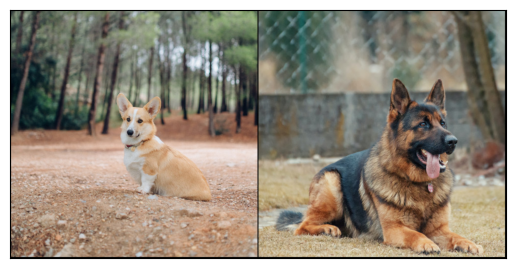

In [2]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

dog1_int = read_image(str(Path("data") / "dog1.jpg"))
dog2_int = read_image(str(Path("data") / "dog2.jpg"))
dog_list = [dog1_int, dog2_int]

grid = make_grid(dog_list, nrow=5)
show(grid)

## Apply `bounding box on the Dog1`

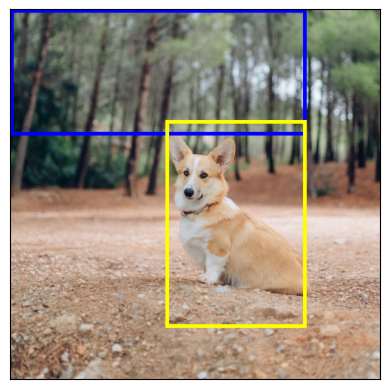

In [3]:
from torchvision.utils import draw_bounding_boxes


boxes = torch.tensor([[0, 0, 400, 170], [210, 150, 400, 430]], dtype=torch.float)
colors = ["blue", "yellow"]
result = draw_bounding_boxes(dog1_int, boxes, colors=colors, width=5)
show(result)

## Save the new `BoundingBox image`

In [5]:
from torchvision.utils import save_image

# save image requires image tensor to be in (0-1 float_32 range)
from torchvision.transforms import v2

float_transform = v2.ToDtype(torch.float32, scale=True)

save_image(float_transform(result), "data/dog-with-bounding-box.jpg")

### Similarly we can `draw segmentation_mask & key-point`.

- [https://pytorch.org/vision/stable/utils.html](https://pytorch.org/vision/stable/utils.html)